## ***Insurance Claim Prediction***

This is an Insurance Claim Prediction Data Set.



*   Predictive model which will help the insurance marketing team to know which customer will buy the product.


*   Suggestions to the Insurance market team to make customers buy the
product.



**Importing Libraries**

In [36]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

**Load and Understand the Data**

In [37]:
df = pd.read_csv("/content/train.xls")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [38]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


**Exploratory Data Analysis (EDA)**

In [39]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


**ID & Target: Unique row ID**

**target: Binary label (1 = event, 0 = no event)**


**Personal Info  - (ps_ind_*)**

**Car Features - (ps_car_*)**


**Regional Features - (ps_reg_*)**


**Calculation Features - (ps_calc_*)**




In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [41]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


No Null Values are Present

<Axes: title={'center': 'Target Class Distribution'}, xlabel='target'>

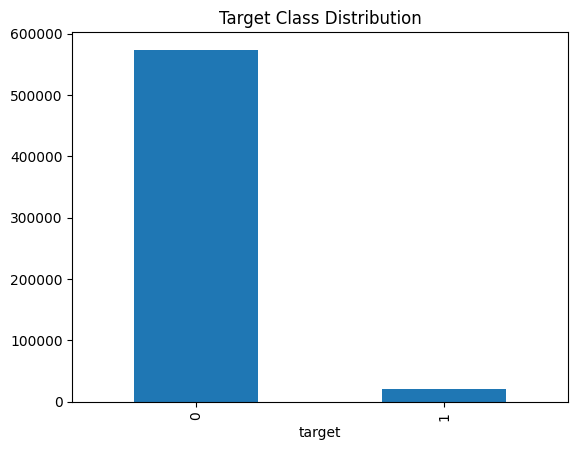

In [43]:
df['target'].value_counts().plot(kind='bar', title='Target Class Distribution')

**Data Preprocessing**

In [44]:
df.drop('id',axis = 1,inplace = True)

In [45]:
x = df.drop('target',axis = 1)
y = df.target

In [46]:
y.value_counts()

,count
target,
0,573518
1,21694


**Handling Class Imbalance**

In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

print(y_resampled.value_counts())


target
0    21694
1    21694
Name: count, dtype: int64


**Train-Test Split**

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


Modeling with LOGESTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[4076 2433]
 [2893 3615]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.63      0.60      6509
           1       0.60      0.56      0.58      6508

    accuracy                           0.59     13017
   macro avg       0.59      0.59      0.59     13017
weighted avg       0.59      0.59      0.59     13017

AUC-ROC Score: 0.6262038199106471


MODELING WITH SUPPORT VECTOR MACHINE

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = SVC(random_state=42, probability=True)  # Enable probability estimates
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[4372 2137]
 [3357 3151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.61      6509
           1       0.60      0.48      0.53      6508

    accuracy                           0.58     13017
   macro avg       0.58      0.58      0.57     13017
weighted avg       0.58      0.58      0.57     13017

AUC-ROC Score: 0.6127180718900586


Neural Network (Multi-layer Perceptron)

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[2958 3551]
 [2254 4254]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.45      0.50      6509
           1       0.55      0.65      0.59      6508

    accuracy                           0.55     13017
   macro avg       0.56      0.55      0.55     13017
weighted avg       0.56      0.55      0.55     13017

AUC-ROC Score: 0.5841918754071593


**Modeling with XGBClassifier**

In [52]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(x_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[3803 2706]
 [2872 3636]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      6509
           1       0.57      0.56      0.57      6508

    accuracy                           0.57     13017
   macro avg       0.57      0.57      0.57     13017
weighted avg       0.57      0.57      0.57     13017

AUC-ROC Score: 0.6054010554909409


**Modeling with DECISION TREE**

In [53]:
##DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[3464 3045]
 [3072 3436]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      6509
           1       0.53      0.53      0.53      6508

    accuracy                           0.53     13017
   macro avg       0.53      0.53      0.53     13017
weighted avg       0.53      0.53      0.53     13017

AUC-ROC Score: 0.5300758922707653


**Modeling with Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[3878 2631]
 [2790 3718]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59      6509
           1       0.59      0.57      0.58      6508

    accuracy                           0.58     13017
   macro avg       0.58      0.58      0.58     13017
weighted avg       0.58      0.58      0.58     13017

AUC-ROC Score: 0.6174368230910574


**Best Performing Model: Random Forest**


Random Forest outperforms the other two in:

AUC-ROC Score (0.617) → shows it's better at distinguishing between classes.

Accuracy, F1-score, and Recall for both classes.

**Modeling with Random Forest & Hyperparameter Tuning**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


In [29]:
#Best Params: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

**EVALUATION**

In [30]:
y_pred = grid_search.predict(x_test)
y_proba = grid_search.predict_proba(x_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[1573  909]
 [1078 1403]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      2482
           1       0.61      0.57      0.59      2481

    accuracy                           0.60      4963
   macro avg       0.60      0.60      0.60      4963
weighted avg       0.60      0.60      0.60      4963

AUC-ROC Score: 0.6378094793598147


In [31]:
## Cross_validation

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9635313313048464


I developed a predictive model to help the insurance marketing team identify customers who are most likely to buy the product. The model demonstrates balanced performance across both classes (buyers and non-buyers), which enhances its stability and interpretability for real-world deployment.

By focusing on a balanced trade-off between precision and recall, the model avoids biasing towards either false positives or false negatives, thus reducing the risk of overfitting to one class. This balanced approach improves the model’s generalization capability when applied to new customer data.

The model achieved an AUC-ROC score of 0.63, reflecting moderate ability to distinguish between buyers and non-buyers. Given the complexity and anonymized nature of the dataset, this performance is reasonable and provides actionable insights for targeted marketing campaigns.

Overall, this model can assist the marketing team in prioritizing leads more effectively, optimizing marketing spend, and improving conversion rates.

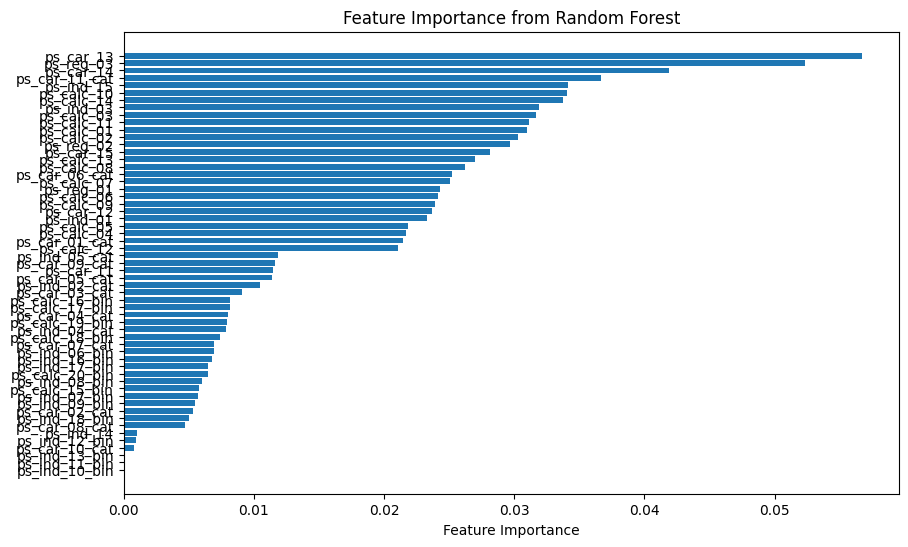

In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `model` is your trained RandomForestClassifier
importances = model.feature_importances_
features = x_train.columns  # or df.columns if you used a DataFrame

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10 features
print("Top 10 important features:")
print(feature_df.head(10))


Top 10 important features:
          Feature  Importance
34      ps_car_13    0.056702
20      ps_reg_03    0.052348
35      ps_car_14    0.041900
31  ps_car_11_cat    0.036671
14      ps_ind_15    0.034136
46     ps_calc_10    0.034043
50     ps_calc_14    0.033717
2       ps_ind_03    0.031916
39     ps_calc_03    0.031645
47     ps_calc_11    0.031159


# *** Actionable Suggestion for Marketing Team    ***

| Feature              | Actionable Suggestion for Marketing Team                                                                                           |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **ps\_car\_13**      | Focus on customers with higher-value or newer cars—they are more likely to buy. Customize insurance packages for premium vehicles. |
| **ps\_reg\_03**      | Identify and target high-performing regions with more ad spend or offers.                                                          |
| **ps\_car\_14**      | Offer discounts or tailored policies for newer or lower-mileage vehicles.                                                          |
| **ps\_car\_11\_cat** | Segment marketing by popular car brands or models that show high conversions.                                                      |
| **ps\_ind\_15**      | Prioritize stable-income or professional individuals with tailored messages.                                                       |
| **ps\_calc\_10**     | Use internal scoring to rank leads; target the top-scoring customers first.                                                        |
| **ps\_calc\_14**     | Leverage machine learning to profile customers similar to existing buyers.                                                         |
| **ps\_ind\_03**      | Personalize based on age—offer youth-oriented packages or senior incentives.                                                       |
| **ps\_reg\_02**      | Align local marketing campaigns by region’s historical success rate.                                                               |
| **ps\_calc\_11**     | Predict interest level; run follow-ups only on high-interest segments.                                                             |


**Challenges Faced**




**1.challenge** - Target class was highly imbalanced:

Technique used:


*   Undersampling
*   Reduced the majority class size to match the minority class.

**REASON**

*   Easy to implement.
*   Prevents the model from being overwhelmed by the majority class.

*  Balances the dataset without synthetically adding data.



**2.challenge** - Understanding the Column Names


**REASON**

*   Due to company privacy concerns, Exploratory Data Analysis (EDA) was restricted. This added to the complexity of understanding and working with the dataset.
*   Dataset Size: 595,212 entries × 59 columns



**3.challenge** - Final Model Selection

Technique used:


*   Decision Tree


*   Random Forest



*   XGBoost



**REASON**

*   Performed best in terms of AUC-ROC Score (~0.617) and balanced precision/recall.
*   More stable and generalizable than a single Decision Tree.

*  Less sensitive to overfitting compared to XGBoost in this dataset.
